In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sb
from sklearn import svm

In [2]:
df = pd.read_csv("E:\\Csv Files\\loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

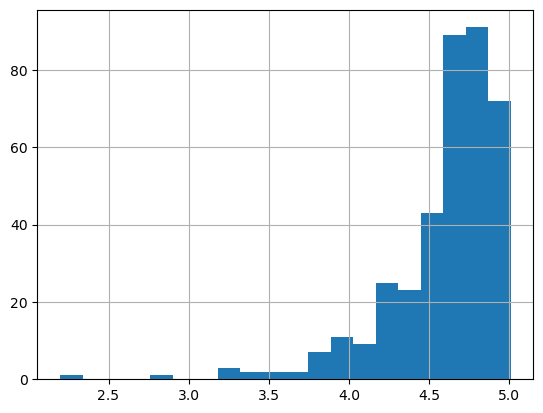

In [5]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

<Axes: >

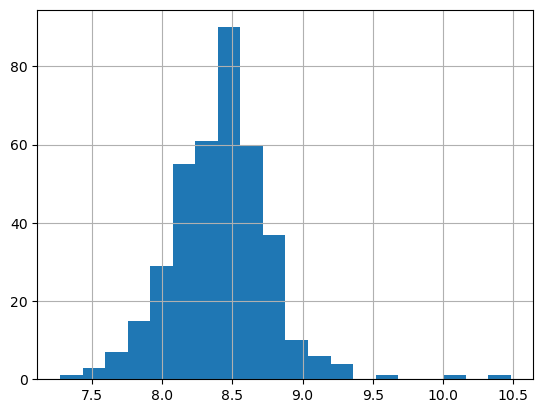

In [7]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 20)

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\4187236884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\4187236884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [9]:
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 10].values
x

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 4941.0],
       ...,
       ['Female', 'No', '0', ..., 1.0, 4.2626798770413155, 2900.0],
       ['Male', 'Yes', '3+', ..., 1.0, 3.6888794541139363, 4106.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [10]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [11]:
print("Per of Missing Gender is %2f%%" %((df['Gender'].isnull().sum() / df.shape[0])*100))

Per of Missing Gender is 0.000000%


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\2391727374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = 'Gender', data = df, palette = 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

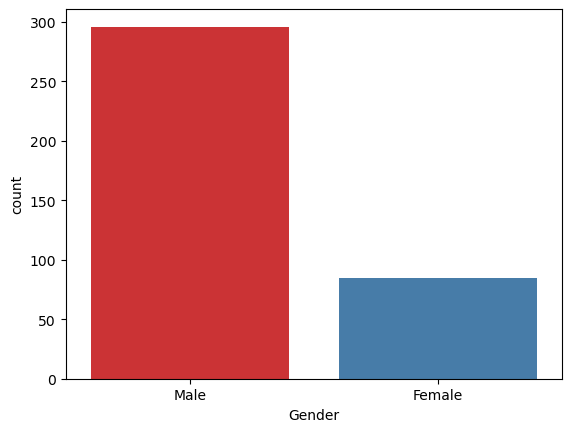

In [12]:
sb.countplot(x = 'Gender', data = df, palette = 'Set1')

Number of People who take loan as Group by marital Status :
Gender
Male      296
Female     85
Name: count, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\1137582448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Gender', data=df, palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

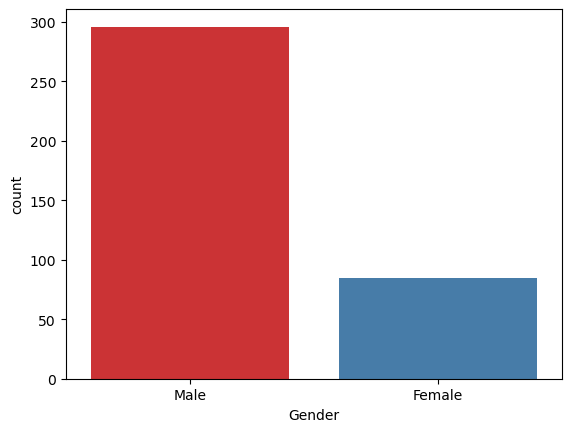

In [16]:
print("Number of People who take loan as Group by marital Status :")
print(df['Gender'].value_counts())
sb.countplot(x='Gender', data=df, palette='Set1')

Number of People who take loan as Group by Married :
Married
Yes    228
No     153
Name: count, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\3502874684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Married', data=df, palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

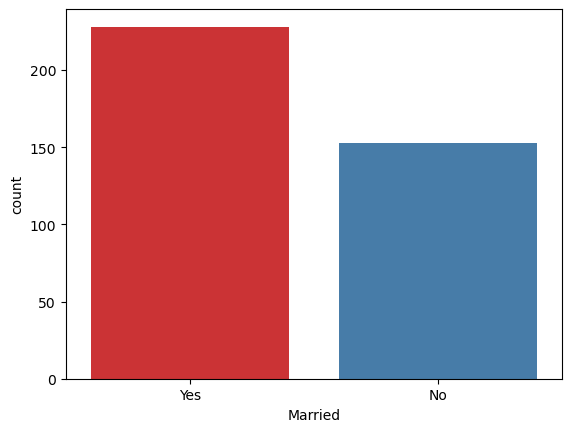

In [17]:
print("Number of People who take loan as Group by Married :")
print(df['Married'].value_counts())
sb.countplot(x='Married', data=df, palette='Set1')

Number of People who take loan as Group by Dependents :
Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\2574630954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Dependents', data=df, palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

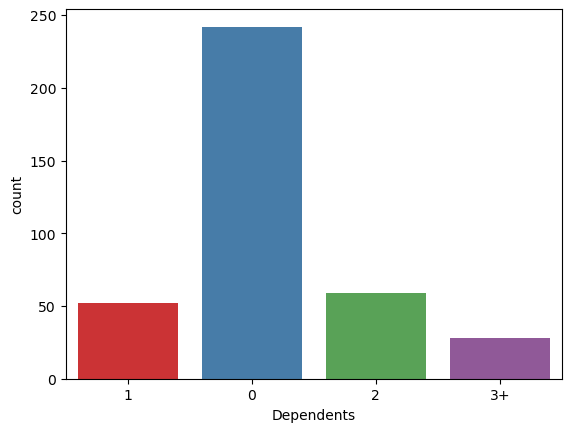

In [18]:
print("Number of People who take loan as Group by Dependents :")
print(df['Dependents'].value_counts())
sb.countplot(x='Dependents', data=df, palette='Set1')

Number of People who take loan as Group by Self_Employed :
Self_Employed
No     346
Yes     35
Name: count, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\4271017227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Self_Employed', data=df, palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

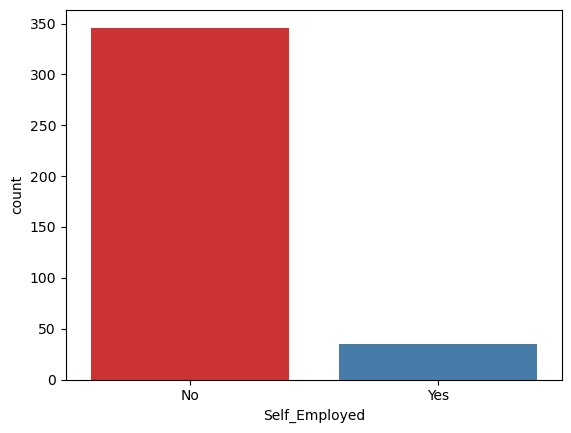

In [19]:
print("Number of People who take loan as Group by Self_Employed :")
print(df['Self_Employed'].value_counts())
sb.countplot(x='Self_Employed', data=df, palette='Set1')

Number of People who take loan as Group by Self_Employed :
LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0      1
63.0      1
101.0     1
48.0      1
40.0      1
Name: count, Length: 101, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\29750080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='LoanAmount', data=df, palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

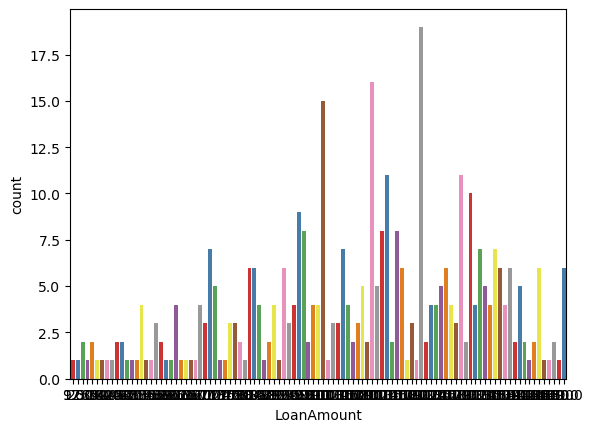

In [20]:
print("Number of People who take loan as Group by LoanAmount :")
print(df['LoanAmount'].value_counts())
sb.countplot(x='LoanAmount', data=df, palette='Set1')

Number of People who take loan as Group by Credit_History :
Credit_History
1.0    324
0.0     57
Name: count, dtype: int64


C:\Users\Rizwan computers\AppData\Local\Temp\ipykernel_11840\3113773846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Credit_History', data=df, palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

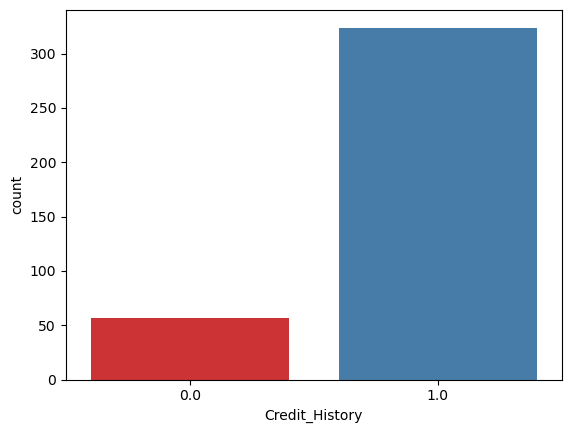

In [21]:
print("Number of People who take loan as Group by Credit_History :")
print(df['Credit_History'].value_counts())
sb.countplot(x='Credit_History', data=df, palette='Set1')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()


In [38]:
for i in range(0, 5):
    
    X_train[:, i] = labelencoder_x.fit_transform(X_train[:, i])  # Proper indentation

    X_train[:, 7] = labelencoder_x.fit_transform(X_train[:, 7])  # Outside the loop

X_train

array([[1, 1, 0, ..., 1.0, 4.653960350157523, 142],
       [1, 1, 3, ..., 1.0, 4.727387818712341, 34],
       [1, 0, 0, ..., 1.0, 4.2626798770413155, 32],
       ...,
       [1, 0, 0, ..., 1.0, 4.787491742782046, 106],
       [0, 0, 0, ..., 0.0, 4.7535901911063645, 105],
       [1, 1, 1, ..., 1.0, 4.74493212836325, 136]], dtype=object)

In [39]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [40]:
labelencoder_x = LabelEncoder()

In [41]:
for i in range(0,5):

    X_test[:,i] = labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = labelencoder_x.fit_transform(X_test[:,7])

X_test

array([[0, 0, 1, 0, 5, 1.0, 4.718498871295094, 23],
       [1, 0, 2, 0, 5, 0.0, 4.382026634673881, 18],
       [1, 0, 0, 0, 5, 1.0, 4.543294782270004, 44],
       [1, 1, 2, 0, 5, 1.0, 4.890349128221754, 62],
       [0, 0, 0, 0, 5, 1.0, 3.828641396489095, 3],
       [0, 0, 0, 0, 5, 1.0, 3.784189633918261, 29],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 7],
       [1, 0, 0, 1, 1, 1.0, 3.2188758248682006, 21],
       [1, 1, 2, 0, 2, 1.0, 4.356708826689592, 14],
       [1, 1, 0, 0, 5, 1.0, 4.787491742782046, 65],
       [1, 0, 0, 0, 5, 1.0, 4.605170185988092, 22],
       [0, 1, 2, 1, 5, 1.0, 4.584967478670572, 11],
       [1, 1, 0, 0, 5, 1.0, 4.8283137373023015, 58],
       [1, 1, 0, 0, 5, 0.0, 4.0943445622221, 1],
       [1, 0, 3, 1, 5, 1.0, 4.997212273764115, 67],
       [1, 0, 0, 0, 5, 1.0, 4.912654885736052, 46],
       [1, 0, 0, 0, 5, 1.0, 4.941642422609304, 63],
       [0, 0, 1, 0, 5, 1.0, 4.499809670330265, 36],
       [1, 0, 0, 0, 6, 1.0, 4.727387818712341, 22],
       [1, 1, 0

In [42]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("Accuracy of Random Forest clf is : ", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Random Forest clf is :  0.8701298701298701


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [65]:
y_pred = nb_clf.predict(X_test)
print("Acc of GaussianNB Classifier is % : ", metrics.accuracy_score(y_pred,y_test))

Acc of GaussianNB Classifier is % :  0.8701298701298701


In [66]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dt_clf.predict(X_test)
print("Acc of DecisionTreeClassifier is : ", metrics.accuracy_score(y_pred, y_test))

Acc of DecisionTreeClassifier is :  0.8701298701298701


In [74]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = kn_clf.predict(X_test)
print("Accuracy of KNN is:", metrics.accuracy_score(y_test, y_pred))

Accuracy of KNN is: 0.8701298701298701


In [77]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)